# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

## Objective

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

Explore the dataset and extract insights using Exploratory Data Analysis.

1. Do the users spend more time on the new landing page than the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? 

4. Is the time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

The idea behind answering these questions is to decide whether the new page is effective enough to gather new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.

## Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# loading the dataset abtest.csv
df = pd.read_csv('abtest.csv')

In [3]:
# first five rows of the data frame
df.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# getting the total rows and columns of the data frame
df.shape

(100, 6)

## Observations:
There are 10 rows and 6 columns in the dataframe.

In [5]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


## Observations:
1. User_id and time_spent_on_the_page are numerical.
2. All other columns are object datatype, which needs to be converted to categorical type for analysis.
3. There are no null values.

In [6]:
#converting object to categorical type
for i in ['group','landing_page','converted','language_preferred']:
    df[i] = df[i].astype('category')

In [7]:
# checking datatype conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


## Observations:
All columns that were object datatype are now categorical.

In [8]:
# five point summary statistics
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


## Observations:
The time spent on any page (old/new) is minimum 0.19 mins and maximum 10.71 mins. On an average, the user spends 5.37 mins on the landing page.

In [9]:
# value counts of group colums
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [10]:
# value counts of landing_page column
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

In [11]:
# value counts of converted column
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [12]:
# value counts of language_preferred column
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

### Observations:
* There are 100 unique users.

* There are 2 unique groups - control and treatment, with 50 users in each.

* There are 2 unique landing pages - new and old.

* 54 users get converted to subscribers while 46 don't after visiting the landing page.

* There are 3 unique languages preferred - French, Spanish and English.

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Time spent on the page

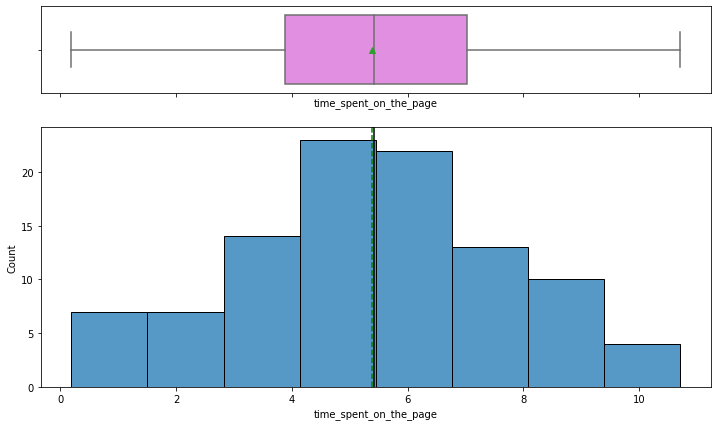

In [15]:
histogram_boxplot(df, 'time_spent_on_the_page')

### Observation:
The distribution of time spent on the page looks normal.

### Group

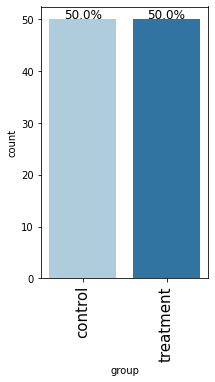

In [16]:
labeled_barplot(df, 'group', perc = True)

### Observation:
There are equal number of users in both the groups.

### Landing Page

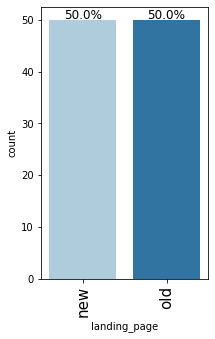

In [17]:
labeled_barplot(df, 'landing_page', perc = True)

### Observation:
There are equal number of users on both the new and old landing pages.

### Converted

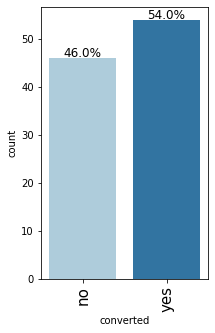

In [18]:
labeled_barplot(df, 'converted', perc = True)

### Observation:
54% of users get converted to a subscriber while 46% don't.

### Language preferred

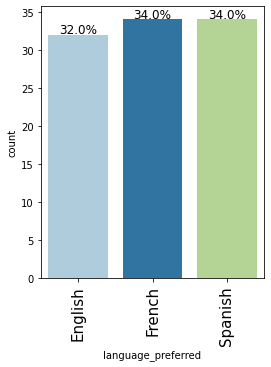

In [19]:
labeled_barplot(df, 'language_preferred', perc = True)

### Observations:
34% users prefer Spanish.
Another 34% prefer French while 32% prefer English.

### Bivariate Analysis

### Landing page vs Time spent on the page

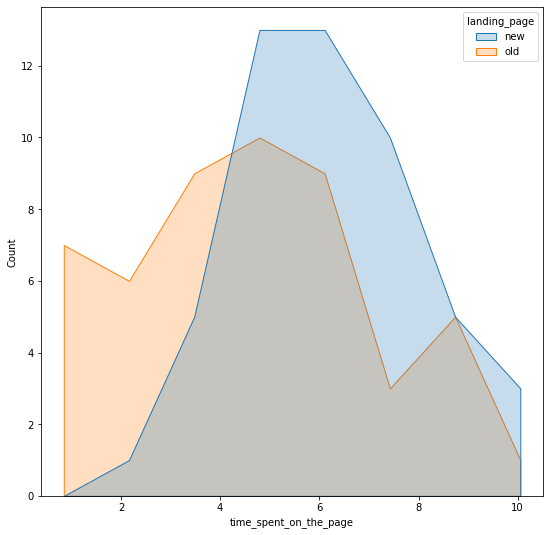

In [20]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'landing_page', element ='poly')
plt.show()

### Observations:
The users on the new landing page spend more time than the ones on the old landing page.

### Conversion status vs Time spent on the page

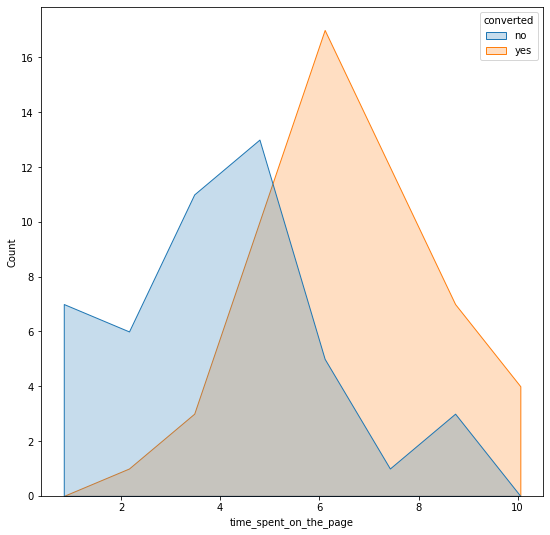

In [21]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'converted', element ='poly')
plt.show()

### Observations:
The users who spent more time on the page converted to a subscriber.

### Preferred language vs Time spent on the page

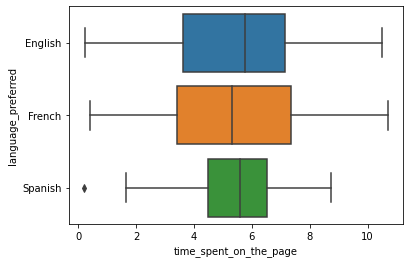

In [22]:
sns.boxplot(data = df, x ='time_spent_on_the_page', y ='language_preferred');

### Observations:
The mean time spent on the page is similar across languages.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

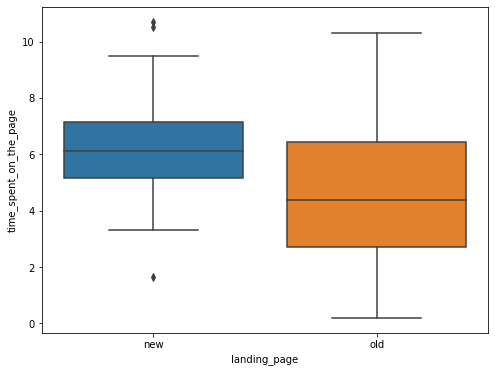

In [23]:
# visual analysis of the time spent on the new page v/s time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Observations:
The median of users spending time on the new landing page is higher than the median of the users spending time on the old landing page. We also see that there are outliers on both sides of the new landing page.

### Step 1: Define the null and alternate hypotheses

Let's write the null and alternative hypothesis
Let  𝜇1,𝜇2  be the mean time spent on the landing page of new and old page respectively.

We will test the null hypothesis

>$H_0:$
𝜇1=𝜇2 

against the alternate hypothesis

>$H_a$: 𝜇1 > 𝜇2

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown.

### Let's test whether the t-test assumptions are satisfied or not

Continuous data - Yes, the mean time is measured on a continuous scale.

Observations are from a simple random sample.

Population standard deviation is unknown.

Hence, we can use t-test for this problem.

### Step 3: Decide the significance level

As given, the significance level α = 0.05

### Step 4: Collect and prepare data

In [24]:
# creating a data frame for new landing page users 
time_spent_new_page = df[df['landing_page'] == 'new']['time_spent_on_the_page']
#print(time_spent_new_page)
# creating a data frame for old landing page users
time_spent_old_page = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [25]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new_page.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old_page.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Observations: 
The sample standard deviations of the two groups are unequal. Hence,the population standard deviations can be assumed to be unequal.

### Step 5: Calculate the p-value

In [26]:
# finding the p-value using the ztest_2samp() function
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new_page, time_spent_old_page.dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [27]:
# printing the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')
    

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

### Insight :
As the p-value is very less than the level of significance, we reject the null hypothesis. Hence, we can conclude that the mean time spent on the new landing page is greater than the old landing page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

In [28]:
df.groupby('landing_page')['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

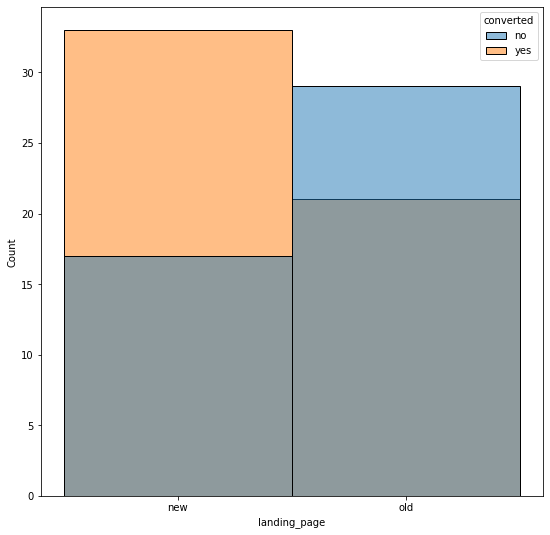

In [29]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'landing_page', hue = 'converted')
plt.show()

### Step 1: Define the null and alternate hypotheses

'landing_page' and 'converted' are two categorical variables.
We want to see if the proportion of users who visit the  new landing page and get converted is greater than the the proportion of users who visit the old landing page and get converted.
>$H_0:$
The proportion of users who visit the  new landing page and get converted is same as the proportion of users who visit the old landing page and get converted.

against the alternative hypothesis

>$H_a$:
The proportion of users who visit the new landing page and get converted is greater than the proportion of users who visit the old landing page and get converted.

### Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test for this problem.

### Step 3: Decide the significance level

Here, we select α = 0.05.

### Step 4: Data Preparation

### Preparing data for test


In [30]:
# number of converted users in the treatment group
new_page_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# number of converted users in the control group
old_page_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The number of converted users for the new and old pages are {0} and {1} respectively'.format(new_page_converted, old_page_converted))

users_control = df.group.value_counts()['control'] # total number of users in the control group
users_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group
print('The numbers of users of the new and old pages are {0} and {1} respectively'.format(users_control, users_treatment))

The number of converted users for the new and old pages are 33 and 21 respectively
The numbers of users of the new and old pages are 50 and 50 respectively


In [31]:
print(f' The proportions of converted users for new and old landing pages are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of converted users for new and old landing pages are 0.66, 0.42 respectively


* The proportions in the sample are different. Let's conduct the test to see if this difference is significant.

### Step 5: Calculate the p-value

In [32]:
# importing the required function
from statsmodels.stats.proportion import proportions_ztest  

# finding the p-value using proportion_ztest
stat, pval = proportions_ztest([new_page_converted,old_page_converted] , [users_control,users_treatment], alternative = 'larger')

# printing the p-value
print('The p-value is '+ str(pval))

The p-value is 0.008026308204056278


## Step 6: Compare the p-value with $\alpha$

In [33]:
# printing the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


## Step 7: Conclusion

Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the proportion of users who visit the new landing page and get converted is greater than the proportion of users who visit the old landing page and get converted.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

In [34]:
df.groupby('language_preferred')['converted'].value_counts()

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

### Visual Analysis

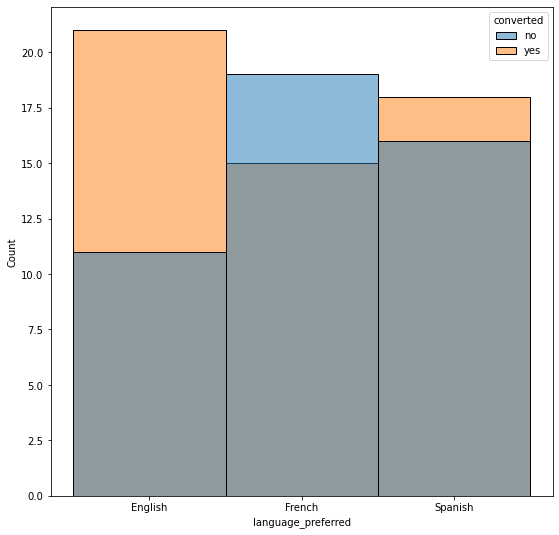

In [35]:
plt.figure(figsize=(9, 9))
sns.histplot(data = df, x = 'language_preferred', hue = 'converted')
plt.show()

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$  Conversion is independent of preferred language
 
 against the alternate hypothesis

>$H_a$: Conversion is dependent on preferred language.

### Step 2: Let's test whether the Chi-Square assumptions are satisfied or not
* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5
* The collected sample is a simple random sample.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [36]:
#creating a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'],
                            df['language_preferred'], 
                                 margins=False)
print(contingency_table)

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


### Step 5: Let's find the p-value

In [37]:
# importing the required function
from scipy.stats import chi2_contingency
df1 = pd.DataFrame(contingency_table)

# finding the p-value
chi, p_value, dof, expected = chi2_contingency(df1)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [38]:
# printing the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the pvalue is > 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the Conversion is dependent on preferred language which means both seem to be independent.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

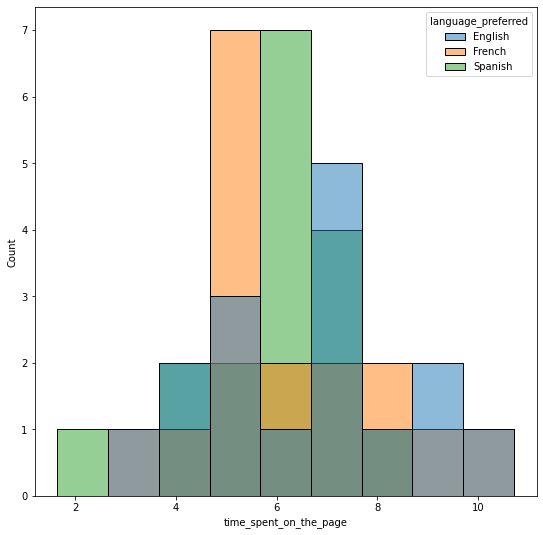

In [39]:
#filtering landing page to keep only new page
df2 = df[df['landing_page'] == 'new']

plt.figure(figsize=(9, 9))
sns.histplot(data = df2, x = 'time_spent_on_the_page', hue = 'language_preferred')
plt.show()

In [40]:
# calculating the mean time spent on the new page for different language users
df2.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

Let's write the null and alternative hypothesis Let 𝜇1,𝜇2,𝜇3 be the mean time spent on the new page for different language users

We will test the null hypothesis

>$H_0:$
𝜇1=𝜇2=𝜇3

against the alternate hypothesis

>$H_a$:
At least one mean time is different from the rest.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. Based on this information, we will select the Anonva test.
Also, we will check the assumptions of normality and equality of variance for the three groups.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [41]:
# Assumption 1: Normality
# importing the required function
from scipy.stats import shapiro

# finding the p-value
w, p_value = shapiro(df2['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [42]:
#Assumption 2: Homogeneity of Variance
#importing the required function
from scipy.stats import levene

# create a subsetted data frame of the time spent on the new page by different language users 
time_spent_English = df2[df2['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French =   df2[df2['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish =  df2[df2['language_preferred']=="Spanish"]['time_spent_on_the_page']

statistic, p_value = levene( time_spent_English, time_spent_French,time_spent_Spanish)
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Calculate the p-value

In [43]:
#importing the required function
from scipy.stats import f_oneway

# performing one-way anova test

test_stat, p_value = f_oneway( time_spent_English, time_spent_French,time_spent_Spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [44]:
# printing the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the pvalue is > 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that at least one mean time is different from the rest. So, the time spent on the new page is statiscally similar for different language users.

## Conclusion:

We explored the dataset and extracted the following insights using Exploratory Data Analysis:

* The users spend more time on the new landing page than the existing landing page.

* The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.

* The converted status is independent of the preferred language.

* The time spent on the new page is statiscally similar for different language users.

## Recommendation to business:

* The new landing page is more effective across all languages. The users spend more time on the new page and also the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page. So, the recommendation to the business is to go ahead with the new page for all the preferred languages.